In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
aapl = yf.Ticker('AAPL')
time = '1y'

data = aapl.history(period = time)
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-11 00:00:00-05:00,223.986981,224.683827,220.502739,223.220444,42005600,0.0,0.0
2024-11-12 00:00:00-05:00,223.539010,224.574321,222.354366,223.220444,40398300,0.0,0.0
2024-11-13 00:00:00-05:00,223.001412,225.629525,221.757040,224.106415,48566200,0.0,0.0
2024-11-14 00:00:00-05:00,224.006870,227.839526,223.986956,227.192459,44923900,0.0,0.0
2024-11-15 00:00:00-05:00,225.380644,225.898307,223.260245,223.986954,47923700,0.0,0.0


In [3]:
# compute moving averages

data['Short_MA'] = data['Close'].rolling(window = 3).mean()
data['Long_MA'] = data['Close'].rolling(window = 5).mean()

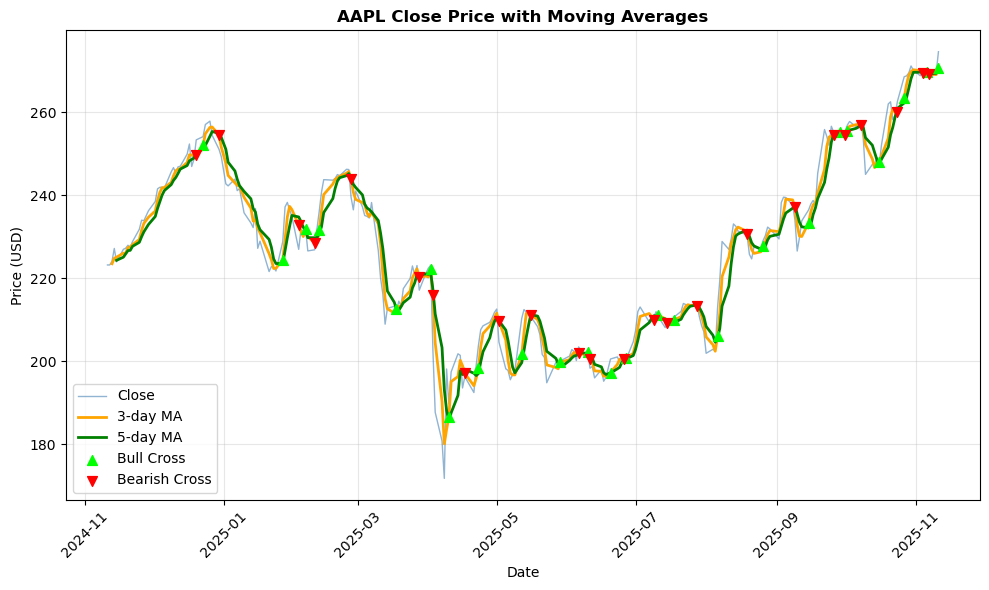

In [9]:
cross_up = (data['Short_MA'] > data['Long_MA']) & (data['Short_MA'].shift(1) <= data['Long_MA'].shift(1)) # below or equal yesterday, but over today
cross_down = (data['Short_MA'] < data['Long_MA']) & (data['Short_MA'].shift(1) >= data['Long_MA'].shift(1))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data.index, data['Close'], label='Close', color='steelblue', linewidth=1, alpha=0.6)
ax.plot(data.index, data['Short_MA'], label='3-day MA', color='orange', linewidth=2)
ax.plot(data.index, data['Long_MA'], label='5-day MA', color='green', linewidth=2)

ax.scatter(data.index[cross_up], data['Short_MA'][cross_up], color='lime', label='Bull Cross', marker='^', s=50, zorder=5)
ax.scatter(data.index[cross_down], data['Short_MA'][cross_down], color='red', label='Bearish Cross', marker='v', s=50, zorder=5)

ax.set_title('AAPL Close Price with Moving Averages', fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.legend(loc = 3)
ax.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
data['Signal'] = np.where(data['Short_MA'] > data['Long_MA'], 1, 0)

data.dropna(inplace = True)
data.head(50)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Short_MA,Long_MA,Signal
Date,,,,,,,,,,
2024-11-15 00:00:00-05:00,225.380644,225.898307,223.260245,223.986954,47923700,0.0,0.0,225.095276,224.345343,1
2024-11-18 00:00:00-05:00,224.235830,228.705619,224.156188,226.993362,44633700,0.0,0.0,226.057592,225.099927,1
2024-11-19 00:00:00-05:00,225.958047,229.123738,225.639496,227.252197,36211800,0.0,0.0,226.077504,225.906277,1
2024-11-20 00:00:00-05:00,227.033178,228.894754,224.872950,227.968948,35169600,0.0,0.0,227.404836,226.678784,1
2024-11-21 00:00:00-05:00,227.849484,229.123719,224.693758,227.491104,42108300,0.0,0.0,227.570750,226.738513,1
2024-11-22 00:00:00-05:00,227.033189,229.681216,227.033189,228.835037,38168300,0.0,0.0,228.098363,227.708130,1
2024-11-25 00:00:00-05:00,230.417878,232.199812,228.705621,231.821518,90152800,0.0,0.0,229.382553,228.673761,1
2024-11-26 00:00:00-05:00,232.279457,234.509377,232.279457,234.001663,45986200,0.0,0.0,231.552739,230.023654,1
2024-11-27 00:00:00-05:00,233.414333,234.628841,232.757301,233.872253,33498400,0.0,0.0,233.231812,231.204315,1
